# 3D Map

While representing the configuration space in 3 dimensions isn't entirely practical it's fun (and useful) to visualize things in 3D.

In this exercise you'll finish the implementation of `create_grid` such that a 3D grid is returned where cells containing a voxel are set to `True`. We'll then plot the result!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 16, 16

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-305.  -435.    85.5    5.     5.    85.5]
 [-295.  -435.    85.5    5.     5.    85.5]
 [-285.  -435.    85.5    5.     5.    85.5]
 ...
 [ 435.   465.     8.     5.     5.     8. ]
 [ 445.   465.     8.     5.     5.     8. ]
 [ 455.   465.     8.     5.     5.     8. ]]


In [4]:
def create_voxmap(data, voxel_size=5):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size

    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)

    for datum in data:
        x, y, z, dx, dy, dz = datum.astype(np.int32)
        obstacle = np.array(((x-dx, x+dx),
                            (y-dy, y+dy),
                            (z-dz, z+dz)))
        obstacle[0] = (obstacle[0] - north_min) // voxel_size
        obstacle[1] = (obstacle[1] - east_min)  // voxel_size
        obstacle[2] = obstacle[2] // voxel_size 
        voxmap[obstacle[0][0]:obstacle[0][1], obstacle[1][0]:obstacle[1][1], obstacle[2][0]:obstacle[2][1]] = True
        
    return voxmap

Create 3D grid.

In [5]:
voxel_size = 10
voxmap = create_voxmap(data, voxel_size)
print(voxmap.shape)

(81, 91, 21)


Plot the 3D grid. 

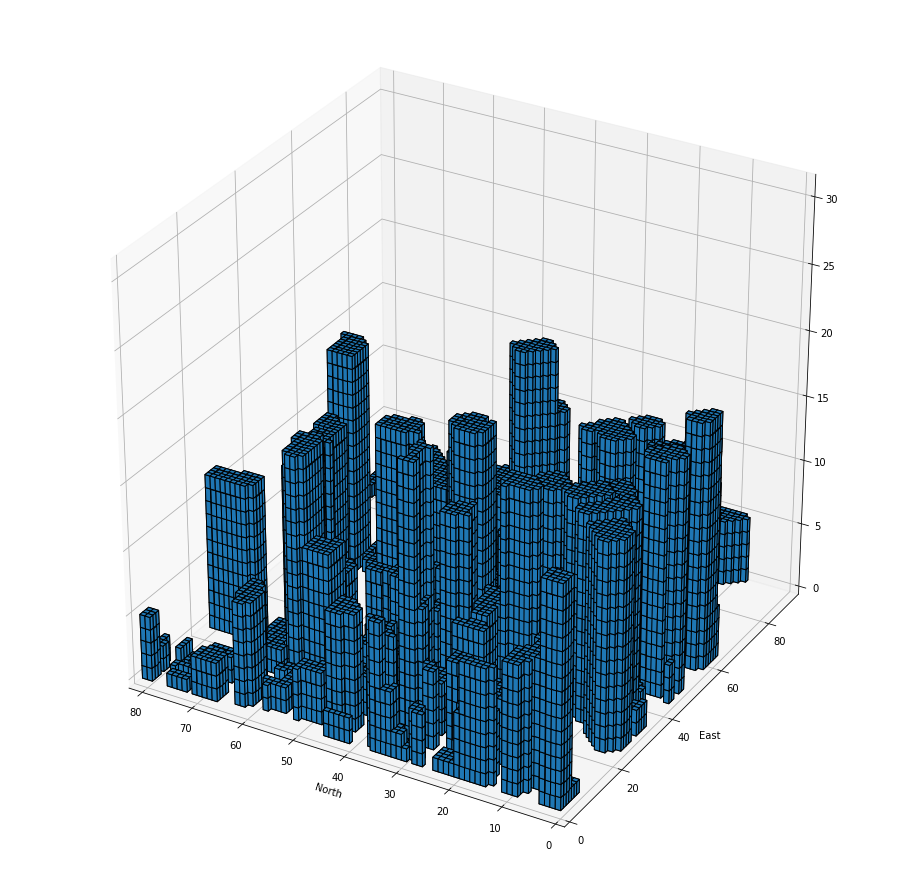

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add 100 to the height so the buildings aren't so tall
ax.set_zlim(0, voxmap.shape[2]+100//voxel_size)

plt.xlabel('North')
plt.ylabel('East')

plt.show()

Isn't the city pretty?